In [0]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [58]:
torch.manual_seed(1)

In [0]:
#load data
dataset=pd.read_csv('iris.csv')

#converting output-labels
dataset.loc[dataset.species=='Iris-setosa','species']=0
dataset.loc[dataset.species=='Iris-versicolor','species']=1
dataset.loc[dataset.species=='Iris-virginica','species']=2

In [0]:
#pandas to numpy-array, input X and output Y
X=dataset[dataset.columns[0:4]].values
Y=dataset[dataset.columns[4]].values


In [0]:
#splitting data
train_x,test_x,train_y,test_y=train_test_split(X,Y,test_size=0.8)

In [0]:
#converting objects to integers
train_y,test_y=train_y.astype(int),test_y.astype(int)

In [0]:
#numpy to torch-tensors
x_train,x_test,y_train,y_test=torch.Tensor(train_x).float(),torch.Tensor(test_x).float(),torch.Tensor(train_y).long(),torch.Tensor(test_y).long()

In [0]:
#Build a model

class net(nn.Module):
  def __init__(self,input_features,output_labels):
    super(net,self).__init__()
    self.f1=nn.Linear(input_features,100)
    self.a1=nn.ReLU()
    self.f2=nn.Linear(100,100)
    self.f3=nn.Linear(100,3)
    self.softmax=nn.Softmax(dim=1)

  def forward(self,x):
    x=self.f1(x)
    x=self.a1(x)
    x=self.f2(x)
    x=self.f3(x)
    x=self.softmax(x)
    return x

In [0]:
#loss and optimizer
model=net(4,3)
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(model.parameters(),lr=0.01)

number of epoch is 0 loss is 1.1053650379180908
number of epoch is 1 loss is 1.1005057096481323
number of epoch is 2 loss is 1.0961499214172363
number of epoch is 3 loss is 1.0922019481658936
number of epoch is 4 loss is 1.0885825157165527
number of epoch is 5 loss is 1.0852288007736206
number of epoch is 6 loss is 1.082092046737671
number of epoch is 7 loss is 1.0791326761245728
number of epoch is 8 loss is 1.0763205289840698
number of epoch is 9 loss is 1.073630690574646
number of epoch is 10 loss is 1.0710421800613403
number of epoch is 11 loss is 1.0685386657714844
number of epoch is 12 loss is 1.0661036968231201
number of epoch is 13 loss is 1.0637257099151611
number of epoch is 14 loss is 1.0613943338394165
number of epoch is 15 loss is 1.0590986013412476
number of epoch is 16 loss is 1.0568307638168335
number of epoch is 17 loss is 1.054584264755249
number of epoch is 18 loss is 1.052352786064148
number of epoch is 19 loss is 1.0501320362091064
number of epoch is 20 loss is 1.04

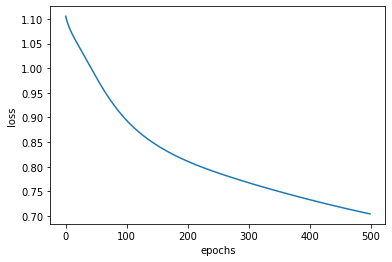

In [66]:
#Train the model
epochs=500
loss1=[]
for epoch in range(epochs):
  yhat=model(x_train)
  loss=loss_fn(yhat,y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  loss1.append(loss.item())
  print('number of epoch is',epoch,'loss is',loss.item())
print('loss is:',loss1)
plt.plot(loss1)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

In [67]:
#predict output of test data
y_predict=model(x_test)
_,labels=torch.max(y_predict,1)
accuracy=accuracy_score(labels,y_test)
print(accuracy)

0.925
